In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import itertools
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator for image augmentation
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals #Module containing functions for feature detection and extraction
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler   #: Classes for scaling features to a mean of 0 and a standard deviation of 1, and scaling features to a given range, respectively.
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS Various layers such as Dense, Dropout, Flatten, Conv2D, etc., for building neural network architectures.
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
Main_Non_DR = Path("../input/diabetic-retinopathy-resized-arranged/0")

In [ ]:
Non_DR_Path = list(Main_Non_DR.glob(r"*.jpeg"))

In [ ]:
DR_Path_Series = pd.Series(Non_DR_Path,name="JPEG").astype(str)

In [ ]:
print(DR_Path_Series.head(-1))

0        ../input/diabetic-retinopathy-resized-arranged...
1        ../input/diabetic-retinopathy-resized-arranged...
2        ../input/diabetic-retinopathy-resized-arranged...
3        ../input/diabetic-retinopathy-resized-arranged...
4        ../input/diabetic-retinopathy-resized-arranged...
                               ...                        
25804    ../input/diabetic-retinopathy-resized-arranged...
25805    ../input/diabetic-retinopathy-resized-arranged...
25806    ../input/diabetic-retinopathy-resized-arranged...
25807    ../input/diabetic-retinopathy-resized-arranged...
25808    ../input/diabetic-retinopathy-resized-arranged...
Name: JPEG, Length: 25809, dtype: object


# VISUALIZATION

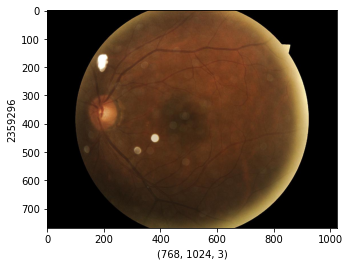

In [ ]:
Example_IMG = DR_Path_Series[23421]
Reading_IMG = cv2.imread(Example_IMG)
Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
plt.xlabel(Reading_IMG.shape)
plt.ylabel(Reading_IMG.size)
plt.imshow(Reading_IMG)

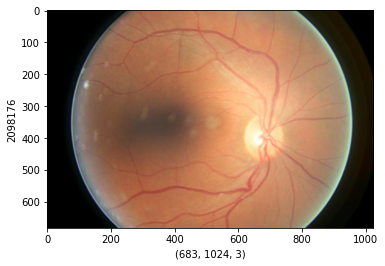

In [ ]:
Example_IMG = DR_Path_Series[5]
Reading_IMG = cv2.imread(Example_IMG)
Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
plt.xlabel(Reading_IMG.shape)
plt.ylabel(Reading_IMG.size)
plt.imshow(Reading_IMG)

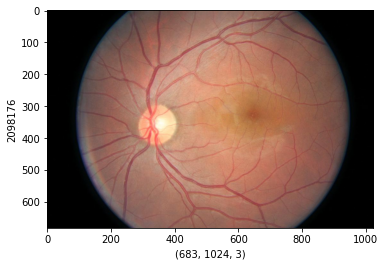

In [ ]:
Example_IMG = DR_Path_Series[1115]
Reading_IMG = cv2.imread(Example_IMG)
Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
plt.xlabel(Reading_IMG.shape)
plt.ylabel(Reading_IMG.size)
plt.imshow(Reading_IMG)

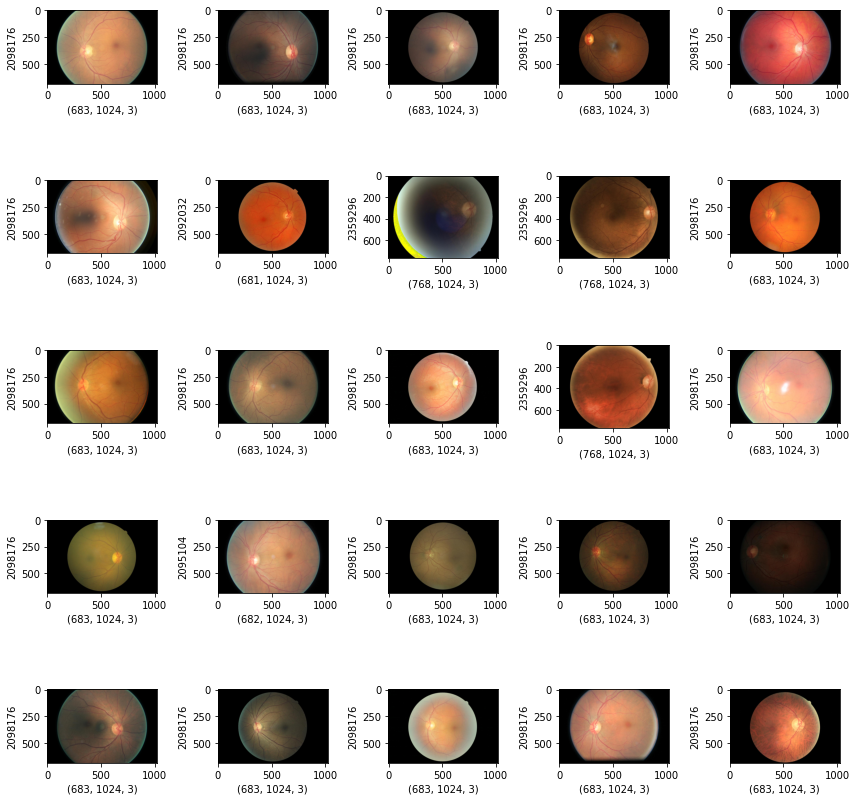

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    IMG_X = cv2.imread(DR_Path_Series[i])
    IMG_X = cv2.cvtColor(IMG_X,cv2.COLOR_BGR2RGB)
    ax.set_xlabel(IMG_X.shape)
    ax.set_ylabel(IMG_X.size)
    ax.imshow(IMG_X)
plt.tight_layout()
plt.show()

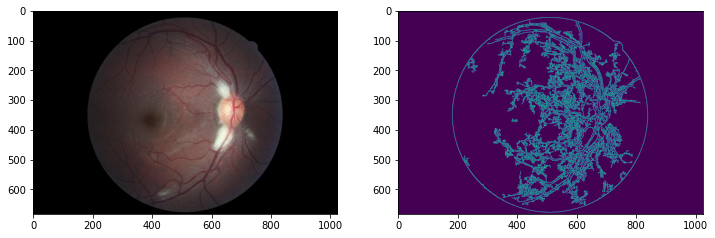

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
#canny method for edge detection
Example_Image = cv2.imread(DR_Path_Series[4352])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
Canny_Image = cv2.Canny(Example_Image,10,100)

axis[0].imshow(Example_Image)
axis[1].imshow(Canny_Image)

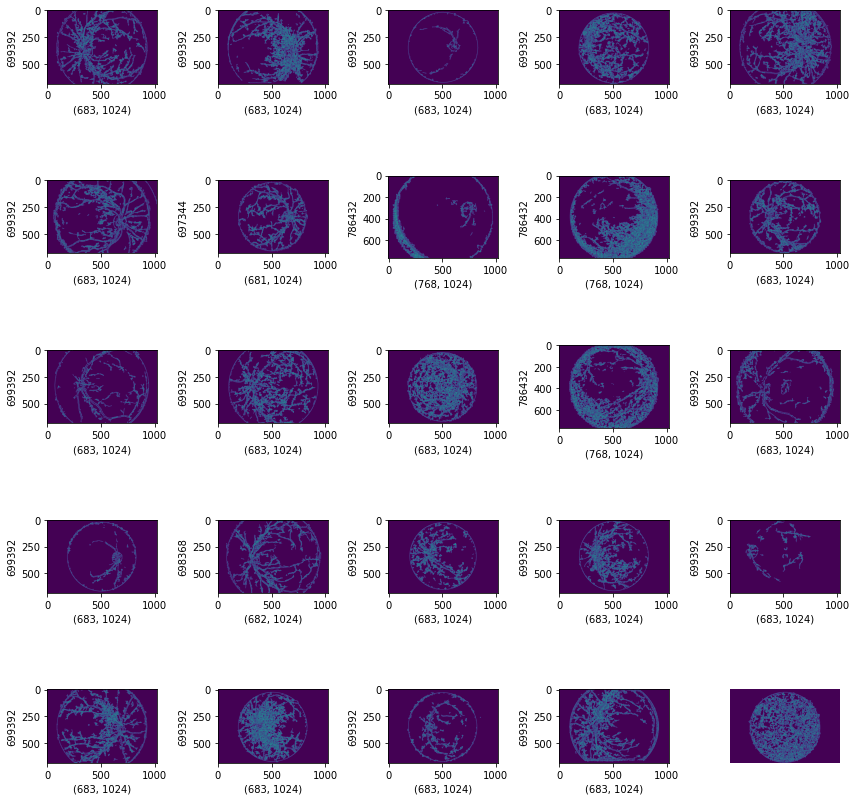

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    Example_Image = cv2.imread(DR_Path_Series[i])
    Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
    Canny_Image = cv2.Canny(Example_Image,50,8)
    ax.set_xlabel(Canny_Image.shape)
    ax.set_ylabel(Canny_Image.size)
    ax.imshow(Canny_Image)
plt.tight_layout()
plt.axis("off")
plt.show()

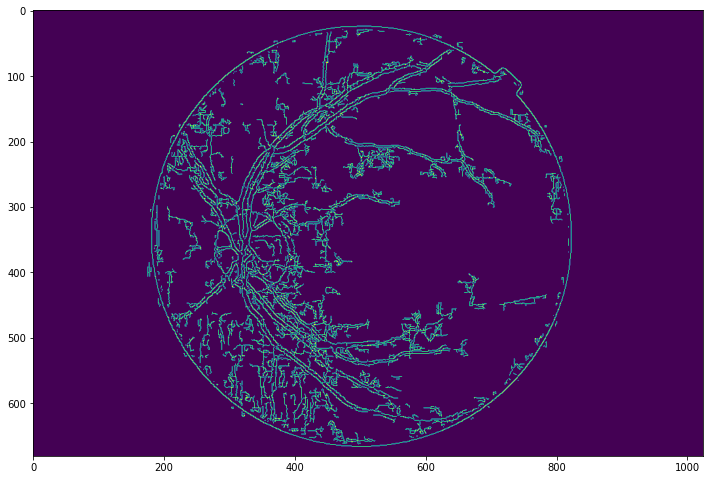

In [ ]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
Canny_Image = cv2.Canny(Example_Image,50,8)

plt.imshow(Canny_Image)

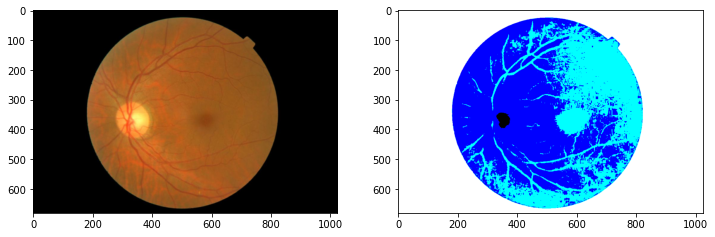

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
#binary images
#thresholding operation
#to seperate the regions of intrest from the backgorund based on pixel values
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

axis[0].imshow(Example_Image)
axis[1].imshow(Threshold_Image)

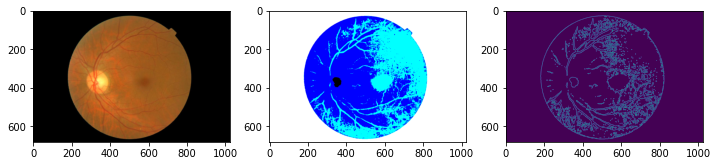

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)
Canny_Image = cv2.Canny(Threshold_Image,10,8)

axis[0].imshow(Example_Image)
axis[1].imshow(Threshold_Image)
axis[2].imshow(Canny_Image)

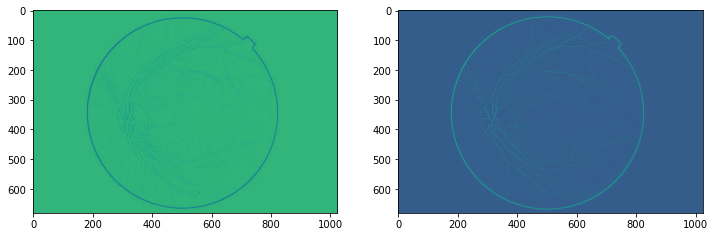

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
#local curvature ,provides the intensity shape of the image and can find the local structure and found the smooth regions
#find the edges and the corners
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
#captures the second order derivative
Hessian_Mat = hessian_matrix(Example_Image,sigma=0.15,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[1].imshow(max_S)

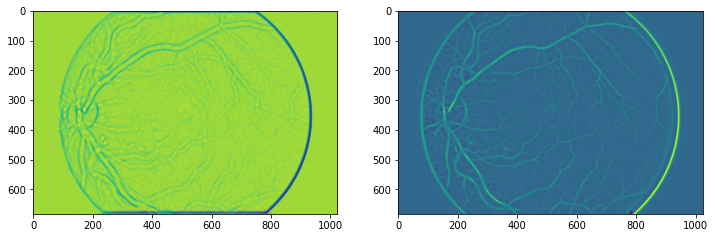

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[48])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=4,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[1].imshow(max_S)

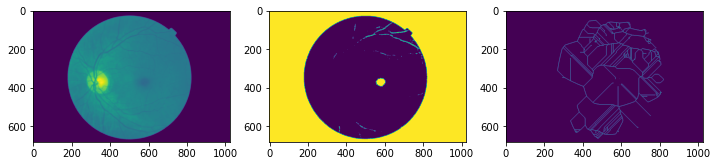

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
#og to grayscale
#grayscale to binary image by thresholding
#binary to skeltonized(preserving thier structures while reducing them to single pixel structure)
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Arr_IMG)

axis[0].imshow(Example_Image)
axis[1].imshow(Threshold_Image)
axis[2].imshow(Skeleton_IMG)

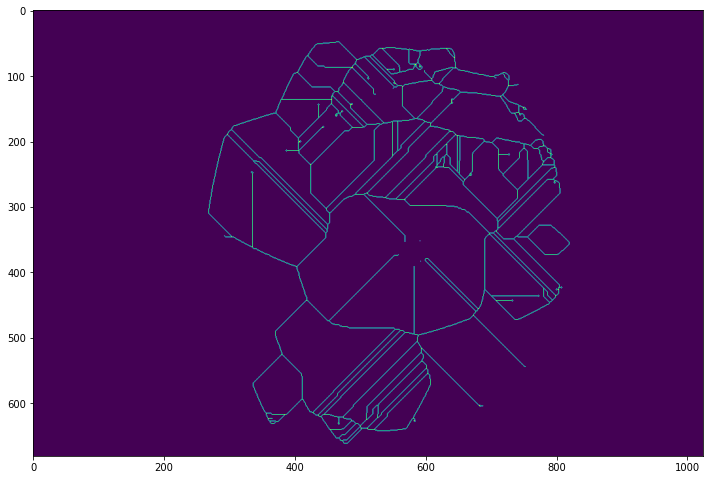

In [ ]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)
#morphologica operation ,reduce shapes into thier skeltons preserving the connectivty of shapes while removing thier unneccessary details
Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Arr_IMG)

plt.imshow(Skeleton_IMG)

In [ ]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[2201])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize_3d(Arr_IMG)

plt.imshow(Skeleton_IMG)

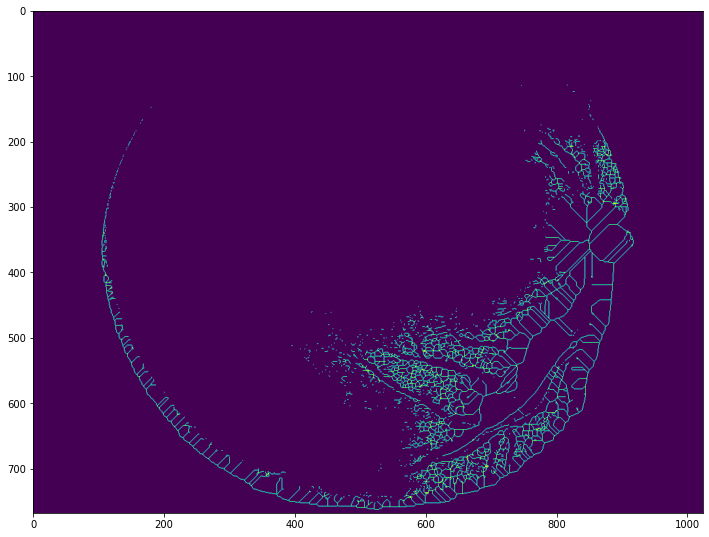

In [ ]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[8])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Arr_IMG)

plt.imshow(Skeleton_IMG)

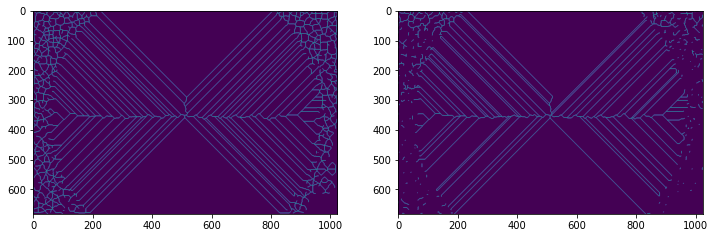

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
#img to grey scale ,compute hessain matrix and eigen values
Example_Image = cv2.imread(DR_Path_Series[48])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
#provide information about the local structure of blood vessels for better feature selection
Hessian_Mat = hessian_matrix(Example_Image,sigma=4,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

Arr_IMG_Min = np.array(Example_Image > min_S).astype(int)
Skeleton_IMG_Min = skimage.morphology.skeletonize(Arr_IMG_Min)

Arr_IMG_Max = np.array(Example_Image > max_S).astype(int)
Skeleton_IMG_Max = skimage.morphology.skeletonize(Arr_IMG_Max)

axis[0].imshow(Skeleton_IMG_Min)
axis[1].imshow(Skeleton_IMG_Max)

# DATA PROCESS

In [ ]:
DR_Path_Series = DR_Path_Series[0:3661]

In [ ]:
print(DR_Path_Series.head(-1))

0       ../input/diabetic-retinopathy-resized-arranged...
1       ../input/diabetic-retinopathy-resized-arranged...
2       ../input/diabetic-retinopathy-resized-arranged...
3       ../input/diabetic-retinopathy-resized-arranged...
4       ../input/diabetic-retinopathy-resized-arranged...
                              ...                        
5994    ../input/diabetic-retinopathy-resized-arranged...
5995    ../input/diabetic-retinopathy-resized-arranged...
5996    ../input/diabetic-retinopathy-resized-arranged...
5997    ../input/diabetic-retinopathy-resized-arranged...
5998    ../input/diabetic-retinopathy-resized-arranged...
Name: JPEG, Length: 5999, dtype: object


In [ ]:
Transformation_Data = []

for pick_IMG in DR_Path_Series:
    IMG_Pick = cv2.imread(pick_IMG)
    IMG_Pick = cv2.cvtColor(IMG_Pick,cv2.COLOR_BGR2RGB)
    IMG_Pick = cv2.resize(IMG_Pick,(180,180))
    IMG_Pick = IMG_Pick / 255.
    Transformation_Data.append(IMG_Pick)

In [ ]:
print(Transformation_Data[3].shape)

(180, 180, 3)


In [ ]:
Training_Set = np.asarray(Transformation_Data)
Training_Set = Training_Set.reshape(-1,180,180,3)

# DC-GAN

In [ ]:
Generator_Input = keras.Input(shape=(180,))
#leakyRelU to introduce non linearlity(preventing the issue of gradients becoming too small and hindering learning),allow model to represent complex relationships between input and output
#to show that fetaure of the noise(input) to be refkected in the output
#express the features of input noise in the o/p
x = layers.Dense(128*90*90)(Generator_Input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((90,90,128))(x)
#two concolutional ;ayer sare introduced to allow different types of features to be extracted
#256 filters used
x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)
#a convilution trabspose layer(deconvolusing) is introduced to sample the features
x = layers.Conv2DTranspose(256,4,padding="same",strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)
#three more additional convolutional layers are added to capture the complex patterns
x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)
#tanh ensures that they are converted well into synthentic images
x = layers.Conv2D(3,7,padding="same",activation="tanh")(x)

In [ ]:
Generator = keras.models.Model(Generator_Input,x)

In [ ]:
print(Generator.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180)]             0         
_________________________________________________________________
dense (Dense)                (None, 1036800)           187660800 
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1036800)           0         
_________________________________________________________________
reshape (Reshape)            (None, 90, 90, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 256)       524544    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 90, 90, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 180, 180, 256)     104883

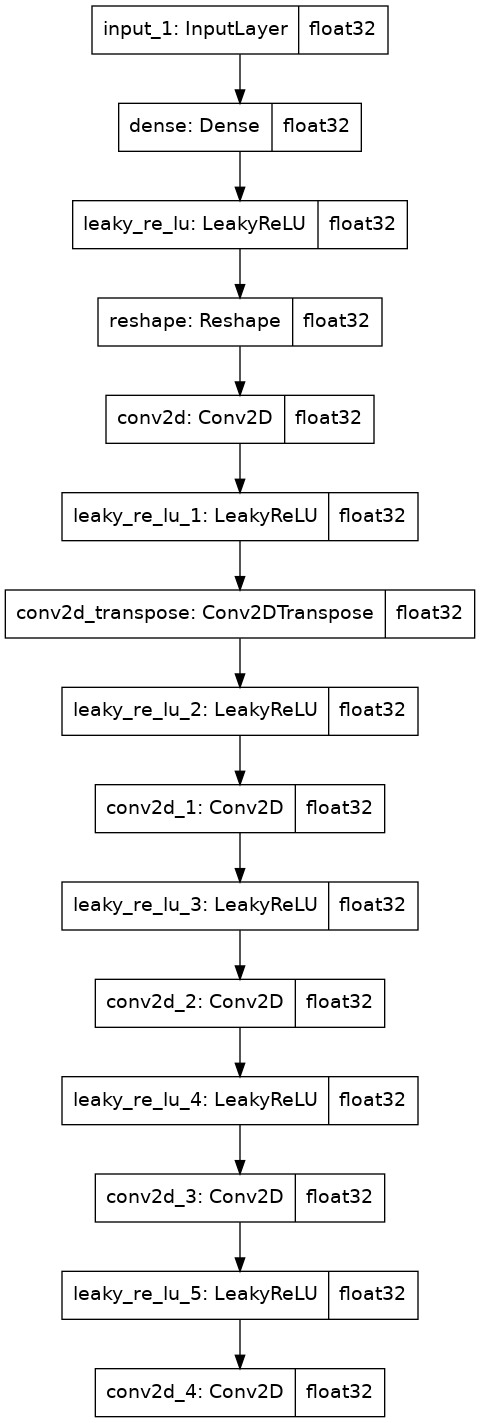

In [ ]:
plot_model(Generator,show_dtype=True,show_layer_names=True)

In [ ]:
Discriminator_Input = layers.Input(shape=(180,180,3))
#128 filters used
x = layers.Conv2D(128,3)(Discriminator_Input)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,3,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)
x = layers.Dense(1,activation="sigmoid")(x)
#sigmoid fuunction are used to tell if they are 0 fake or 1 real

In [ ]:
Discriminator = keras.models.Model(Discriminator_Input,x)

In [ ]:
print(Discriminator.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 178, 128)     3584      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 178, 178, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 88, 88, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 88, 88, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 43, 128)       262272    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 43, 43, 128)       0   

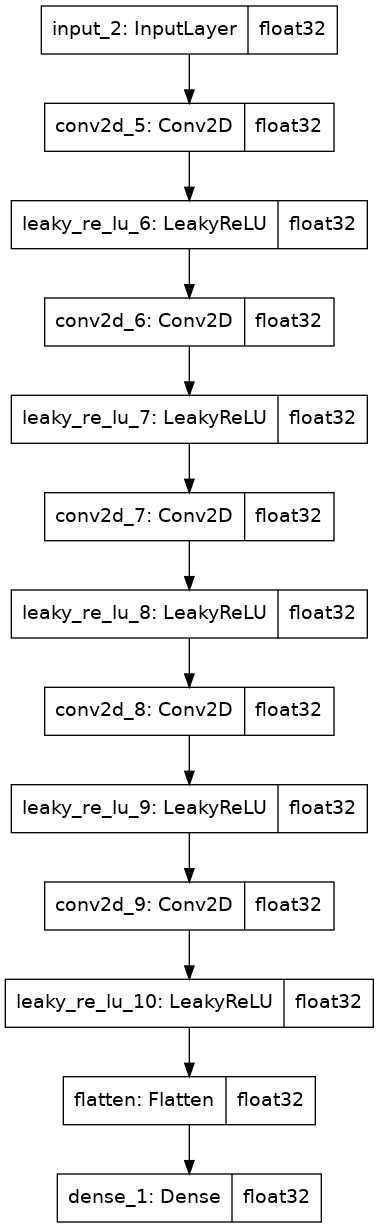

In [ ]:
plot_model(Discriminator,show_dtype=True,show_layer_names=True)

In [ ]:
Discriminator.compile(optimizer=RMSprop(lr=0.0004,clipvalue=1.0,decay=1e-8),loss="binary_crossentropy")
#rmsprop used for training deep neural networks that controls the step size for the optimization of the image
#determines how much the model weights
#reduce the learnig rate overtime
#binary_crossentropy for binary classifiaction

In [ ]:
Discriminator.trainable = False
#model weights will not be changed,they freeze the discrimaotr parameters so that they are not modeifies during loss gradieint
#encourages the generator to exploit weaknesses in the discriminator's current state
#produce an effective gan

In [ ]:
GAN_Input = keras.Input(shape=(180,))
GAN_Output = Discriminator(Generator(GAN_Input))
#iterative step for generator to produce realistic image and discrimator to distinsh

In [ ]:
GAN_Model = keras.models.Model(GAN_Input,GAN_Output)

In [ ]:
GAN_Model.compile(optimizer=RMSprop(lr=0.0004,clipvalue=1.0,decay=1e-8),loss="binary_crossentropy")

In [ ]:
print(GAN_Model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180)]             0         
_________________________________________________________________
model (Functional)           (None, 180, 180, 3)       191500803 
_________________________________________________________________
model_1 (Functional)         (None, 1)                 948353    
Total params: 192,449,156
Trainable params: 191,500,803
Non-trainable params: 948,353
_________________________________________________________________
None


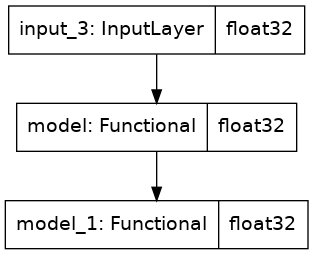

In [ ]:
plot_model(GAN_Model,show_dtype=True,show_layer_names=True)

#### SAVING PATH

In [ ]:
os.mkdir("NEW_IRIS_PIC")

#### TRAINING

In [ ]:
start_period = 0
batch_size = 32
dim_size = 180
iterations = 3000

In [ ]:
for step in range(iterations):
    random_noise_vector = np.random.normal(size=(batch_size,dim_size))
    Generator_Iris = Generator.predict(random_noise_vector)

    stop = start_period + batch_size

    Real_Iris = Training_Set[start_period:stop]

    Combinated_Iris = np.concatenate([Generator_Iris,Real_Iris])

    labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])
    labels = labels + 0.05 * np.random.random(labels.shape)

    Discriminator_Loss = Discriminator.train_on_batch(Combinated_Iris,labels)

    random_noise_vector = np.random.normal(size=(batch_size,dim_size))

    misleading_vector = np.zeros((batch_size,1))

    Adversarial_Loss = GAN_Model.train_on_batch(random_noise_vector,misleading_vector)

    start_period = start_period + batch_size

    if start_period > len(Training_Set) - batch_size:
        start_period = 0
    if step % 5 == 0:
        GAN_Model.save_weights("DCGAN_M_Weights.h5")

        print("DISCRIMINATOR LOSS: ", "%.3f" % Discriminator_Loss)
        print("ADVERSARIAL LOSS: ", "%.3f" % Adversarial_Loss)

        Img_X_X = image.array_to_img(Generator_Iris[0] * 255., scale=False)
        Img_X_X.save(os.path.join("./NEW_IRIS_PIC","FAKE" + str(step)+".png"))

        Img_X_X = image.array_to_img(Real_Iris[0] * 255.,scale=False)
        Img_X_X.save(os.path.join("./NEW_IRIS_PIC","REAL"+str(step)+".png"))

GAN_Model.save("GAN_MAIN.h5")
print("SUCCESS")

DISCRIMINATOR LOSS:  0.690
ADVERSARIAL LOSS:  0.678
DISCRIMINATOR LOSS:  0.639
ADVERSARIAL LOSS:  1.711
DISCRIMINATOR LOSS:  0.572
ADVERSARIAL LOSS:  10.513
DISCRIMINATOR LOSS:  0.424
ADVERSARIAL LOSS:  6.016
DISCRIMINATOR LOSS:  0.398
ADVERSARIAL LOSS:  0.784
DISCRIMINATOR LOSS:  0.463
ADVERSARIAL LOSS:  0.926
DISCRIMINATOR LOSS:  0.690
ADVERSARIAL LOSS:  0.192
DISCRIMINATOR LOSS:  0.448
ADVERSARIAL LOSS:  0.747
DISCRIMINATOR LOSS:  0.615
ADVERSARIAL LOSS:  4.567
DISCRIMINATOR LOSS:  0.623
ADVERSARIAL LOSS:  1.013
DISCRIMINATOR LOSS:  0.631
ADVERSARIAL LOSS:  0.939
DISCRIMINATOR LOSS:  0.514
ADVERSARIAL LOSS:  1.475
DISCRIMINATOR LOSS:  0.861
ADVERSARIAL LOSS:  4.155
DISCRIMINATOR LOSS:  0.625
ADVERSARIAL LOSS:  1.495
DISCRIMINATOR LOSS:  0.594
ADVERSARIAL LOSS:  1.037
DISCRIMINATOR LOSS:  0.671
ADVERSARIAL LOSS:  1.625
DISCRIMINATOR LOSS:  0.622
ADVERSARIAL LOSS:  1.331
DISCRIMINATOR LOSS:  0.610
ADVERSARIAL LOSS:  0.854
DISCRIMINATOR LOSS:  0.687
ADVERSARIAL LOSS:  4.616
DISCRIMINAT

#### PREDICTION

In [ ]:
Random_New_Noise = tf.random.normal(shape=[30,dim_size])

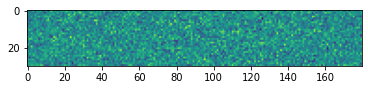

In [ ]:
plt.imshow(Random_New_Noise)

In [ ]:
Generator_Prediction_Iris = Generator(Random_New_Noise)

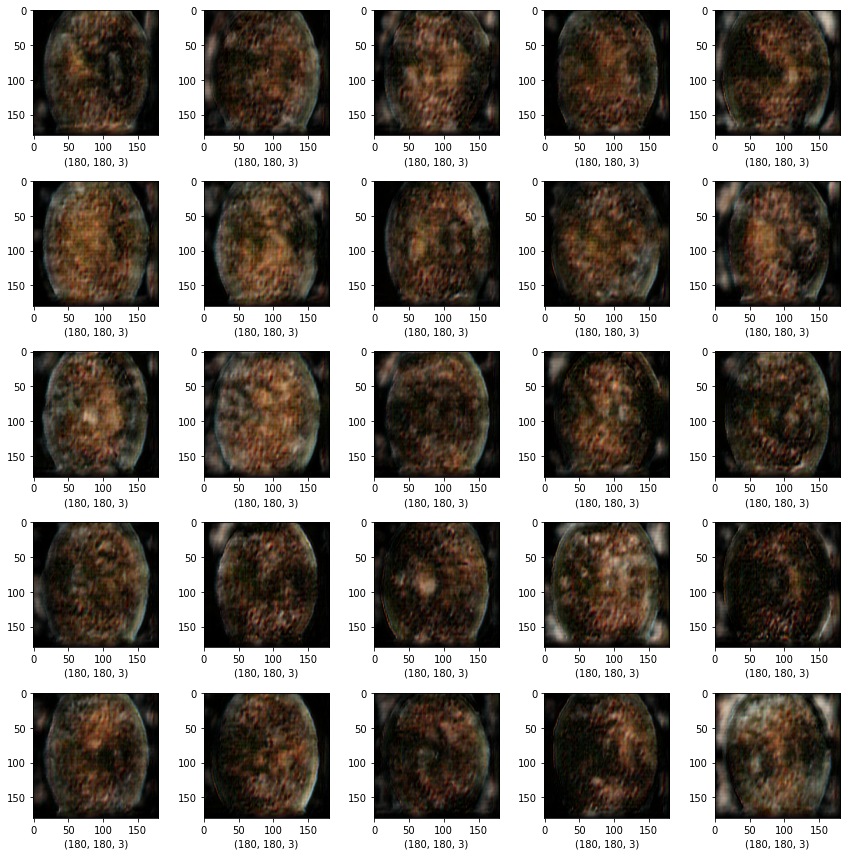

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    IMG_Predict = Generator_Prediction_Iris[i]
    ax.imshow(IMG_Predict)
    ax.set_xlabel(IMG_Predict.shape)
plt.tight_layout()
plt.show()

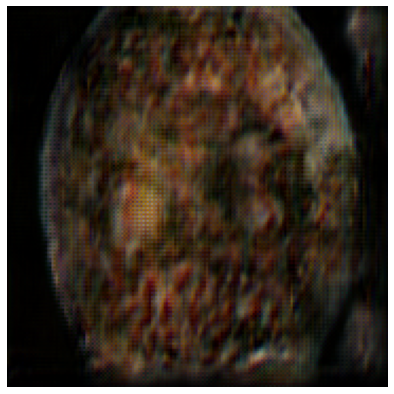

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[7])
plt.show()

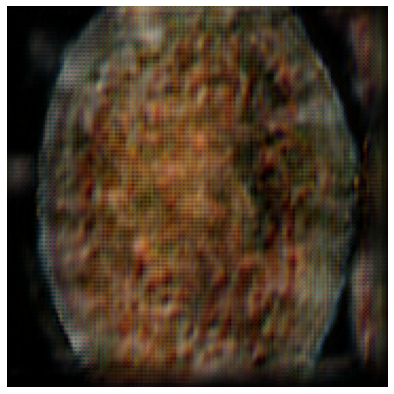

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[5])
plt.show()

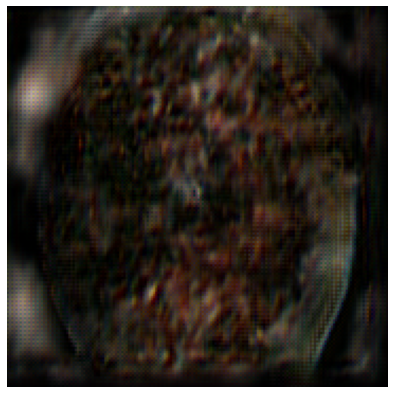

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[28])
plt.show()

In [ ]:
Output_IMG = Path("./NEW_IRIS_PIC")
List_Output_IMG = list(Output_IMG.glob(r"*.png"))
List_Output_IMG_Series = pd.Series(List_Output_IMG,name="PNG").astype(str)

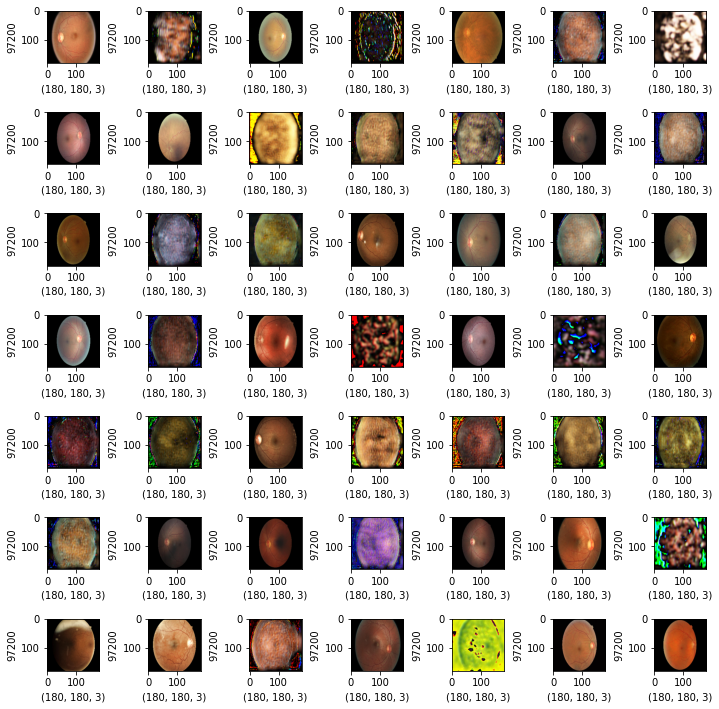

In [ ]:
figure, axes = plt.subplots(nrows=7,ncols=7,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    List_Gen_Image = cv2.imread(List_Output_IMG_Series[i])
    List_Gen_Image = cv2.cvtColor(List_Gen_Image,cv2.COLOR_BGR2RGB)
    ax.imshow(List_Gen_Image,cmap="binary")
    ax.set_xlabel(List_Gen_Image.shape)
    ax.set_ylabel(List_Gen_Image.size)
plt.tight_layout()
plt.show()

In [ ]:
def splitting_text(main_path,path_list,labels_list):

    for image in main_path:
        ID_Path,document_type = os.path.splitext(image)
        main_path,type_iris = ID_Path.split("/")
        path_list.append(image)
        labels_list.append(type_iris[0:4])

In [ ]:
Path_PNG_List = []
Labels_PNG_List = []

In [ ]:
splitting_text(List_Output_IMG,Path_PNG_List,Labels_PNG_List)

In [ ]:
print(Path_PNG_List[0:3])

[PosixPath('NEW_IRIS_PIC/REAL230.png'), PosixPath('NEW_IRIS_PIC/FAKE205.png'), PosixPath('NEW_IRIS_PIC/REAL455.png')]


In [ ]:
print(Labels_PNG_List[0:3])

['REAL', 'FAKE', 'REAL']


In [ ]:
Path_PNG_Series = pd.Series(Path_PNG_List,name="PNG").astype(str)
Labels_PNG_Series = pd.Series(Labels_PNG_List,name="CATEGORY")
Main_Total_Data = pd.concat([Path_PNG_Series,Labels_PNG_Series],axis=1)

In [ ]:
print(Main_Total_Data.head(-1))

                          PNG CATEGORY
0    NEW_IRIS_PIC/REAL230.png     REAL
1    NEW_IRIS_PIC/FAKE205.png     FAKE
2    NEW_IRIS_PIC/REAL455.png     REAL
3    NEW_IRIS_PIC/FAKE285.png     FAKE
4    NEW_IRIS_PIC/REAL480.png     REAL
..                        ...      ...
394   NEW_IRIS_PIC/REAL80.png     REAL
395   NEW_IRIS_PIC/REAL30.png     REAL
396   NEW_IRIS_PIC/FAKE65.png     FAKE
397  NEW_IRIS_PIC/REAL435.png     REAL
398  NEW_IRIS_PIC/FAKE370.png     FAKE

[399 rows x 2 columns]


In [ ]:
Fake_Iris = Main_Total_Data[Main_Total_Data["CATEGORY"] == "FAKE"]
Fake_Iris = Fake_Iris.reset_index()

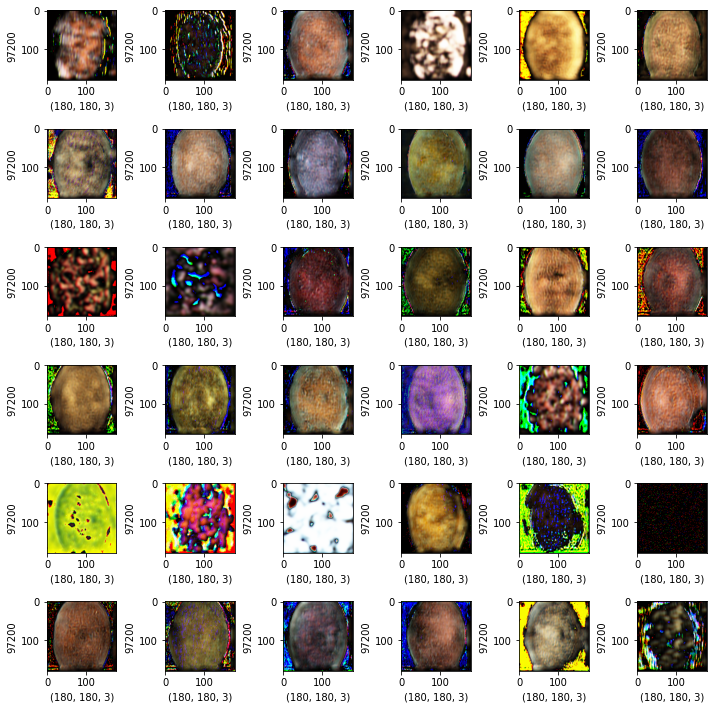

In [ ]:
figure, axes = plt.subplots(nrows=6,ncols=6,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    List_Gen_Image = cv2.imread(Fake_Iris["PNG"][i])
    List_Gen_Image = cv2.cvtColor(List_Gen_Image,cv2.COLOR_BGR2RGB)
    ax.imshow(List_Gen_Image,cmap="binary")
    ax.set_xlabel(List_Gen_Image.shape)
    ax.set_ylabel(List_Gen_Image.size)
plt.tight_layout()
plt.show()

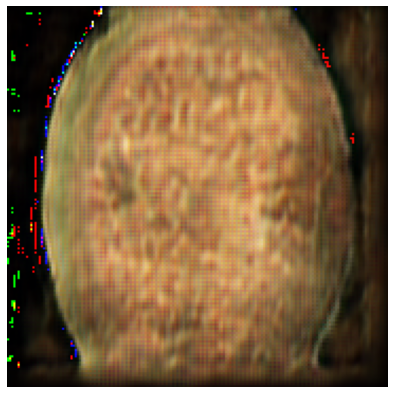

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][5]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

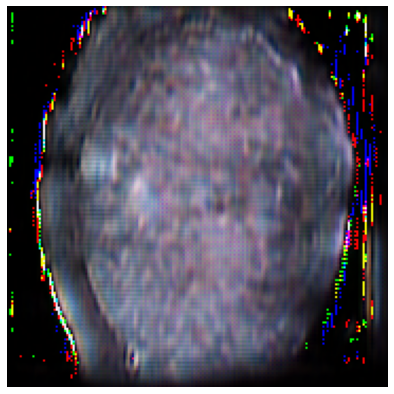

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][8]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

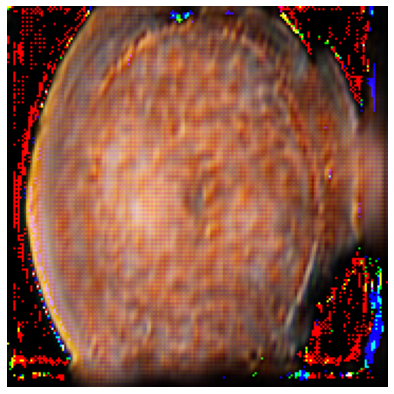

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][23]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

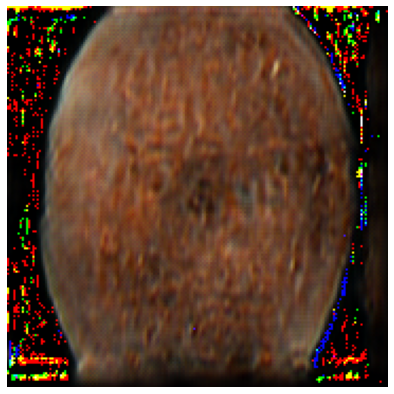

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][30]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

In [ ]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

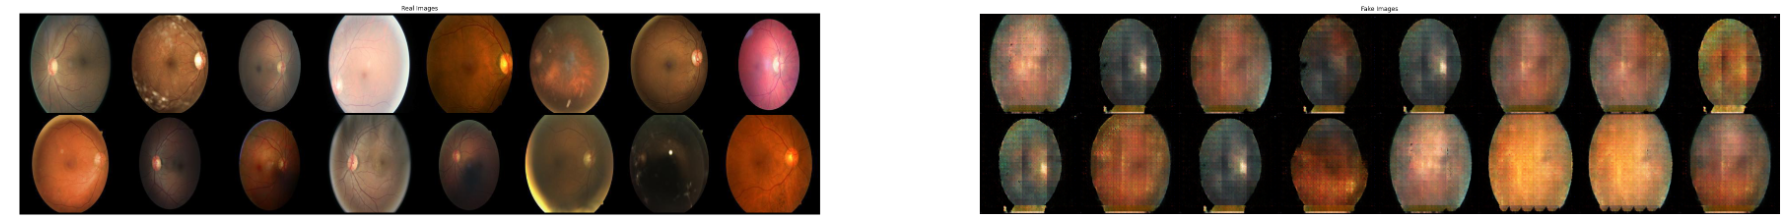

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(64,64))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Assuming img_real and img_generated are the real and generated images, respectively

# Convert images to uint8
img_real_uint8 = np.uint8(real_images * 255)
img_generated_uint8 = np.uint8(generated_img * 255)

# Calculate SSIM
ssim_score, _ = ssim(img_real_uint8, img_generated_uint8, full=True, multichannel=True)

# Calculate PSNR
psnr_score = psnr(img_real_uint8, img_generated_uint8)

print("SSIM Score:", ssim_score) #STRUCTURAL SIMI INDEX, COMPARE REAL VS GENERATED(-1 to 1)(the contrast ,structure lumincanse)
print("PSNR Score:", psnr_score)  # PEAK SIGNAL TO NOISE , EVALUATE QUALITY OF GENERATED(reconstrcuted) IMAGES higher psnr means less distortion and better image qualtity

SSIM Score:0.8135950589630103
PSNR Score:28.219616080106317


downlaod the augmented dataset

In [ ]:
import os
from zipfile import ZipFile
from IPython.display import FileLink

In [ ]:
#saving the new image dataset
generator.save('saved_model/gen1')


In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

pd.set_option('display.max_rows', 10)

In [ ]:
!ls /kaggle/input

In [ ]:
!echo "export KAGGLE_USERNAME=<anjaliiyer>" >> ~/.bashrc
!echo "export KAGGLE_KEY=<98af81e43dc794b8cafb2d63acd13fa7>" >> ~/.bashrc
!source ~/.bashrc


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
